# **Heart Illness Detection AI-ML Model**

## **Install Tensorflow 2.16.2**

In [ ]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (590.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.2 which is incompatible.


## **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## **Upload Data**

In [ ]:
data = pd.read_csv('switzerlandinstitutecardiology.csv', encoding='latin-1')
print(data.columns)

Index(['Patient ID', 'Heart Rate (bpm)', 'Body Temperature (Â°C)',
       'Heart Disease (0 = No, 1 = Yes)'],
      dtype='object')


## **Data Preprocessing**

In [ ]:
X = data[['Heart Rate (bpm)', 'Body Temperature (Â°C)']]
y = data['Heart Disease (0 = No, 1 = Yes)']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modelling**

In [ ]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## **Model Training**

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6181 - loss: 0.6943 - val_accuracy: 0.8000 - val_loss: 0.5560
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.5430 - val_accuracy: 0.9700 - val_loss: 0.3969
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9447 - loss: 0.3807 - val_accuracy: 0.9700 - val_loss: 0.2858
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.2923 - val_accuracy: 0.9700 - val_loss: 0.2077
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.2289 - val_accuracy: 0.9700 - val_loss: 0.1553
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.1942 - val_accuracy: 0.9700 - val_loss: 0.1261
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.2008 - val_accuracy: 1.0000 - val_loss: 0.1041
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.1467 - val_accuracy: 1.0000 - v

## **Model Performance**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0023 
Test accuracy: 1.0


## **Prediksi dengan Model**

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


## **Evaluasi Model**

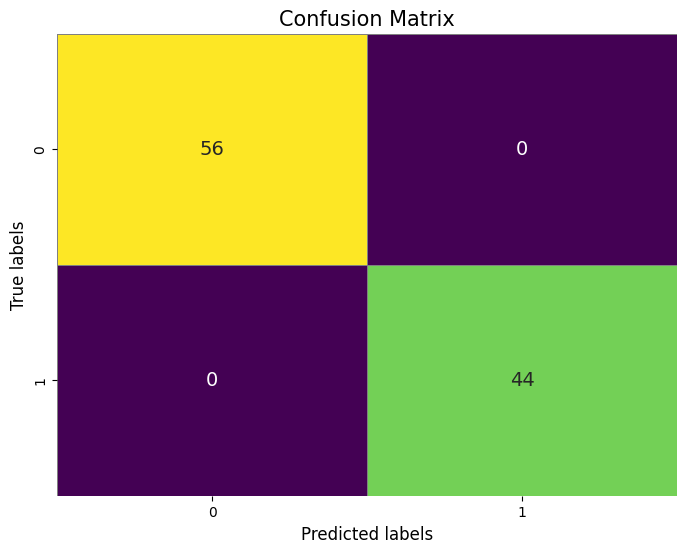

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

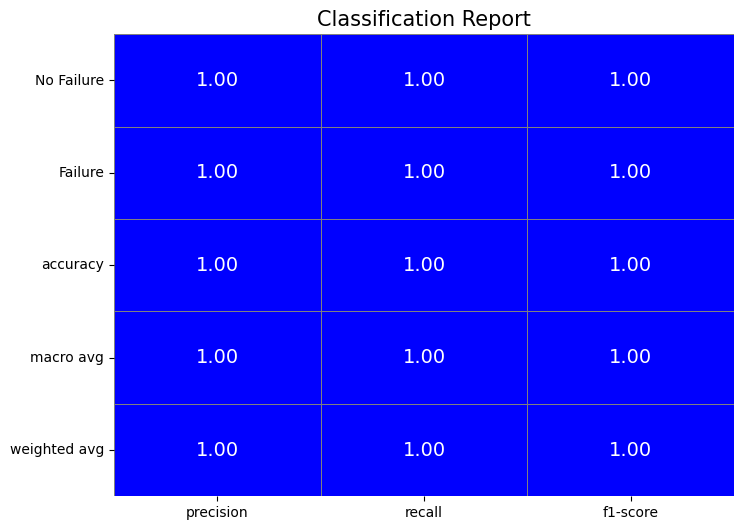

In [ ]:
report = classification_report(y_test, predictions, target_names=['No Failure', 'Failure'], output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T

plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='bwr', fmt='.2f', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.yticks(rotation=0)
plt.title('Classification Report', fontsize=15)
plt.show()

## **Model Architecture**

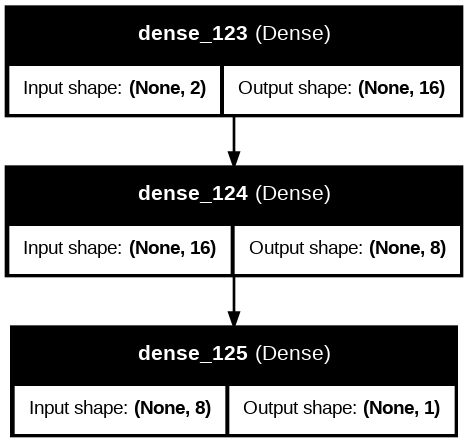

In [ ]:
plot_model(model, to_file='AI_ML_Model.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=96)

## **Accuracy-Loss untuk Train & Validation**

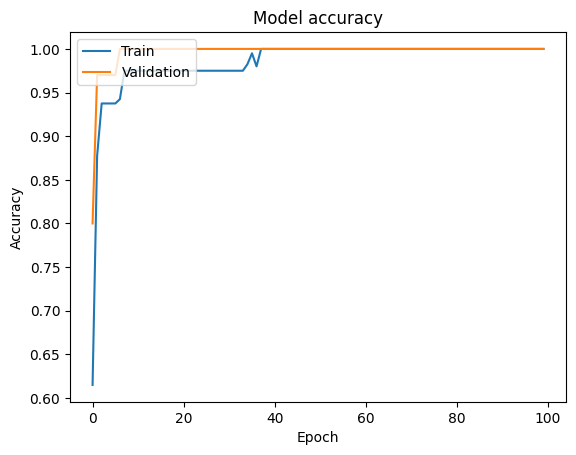

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

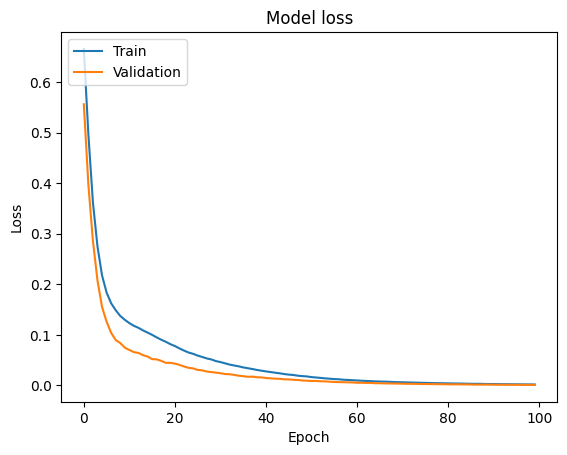

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Actual-Predicted Values**

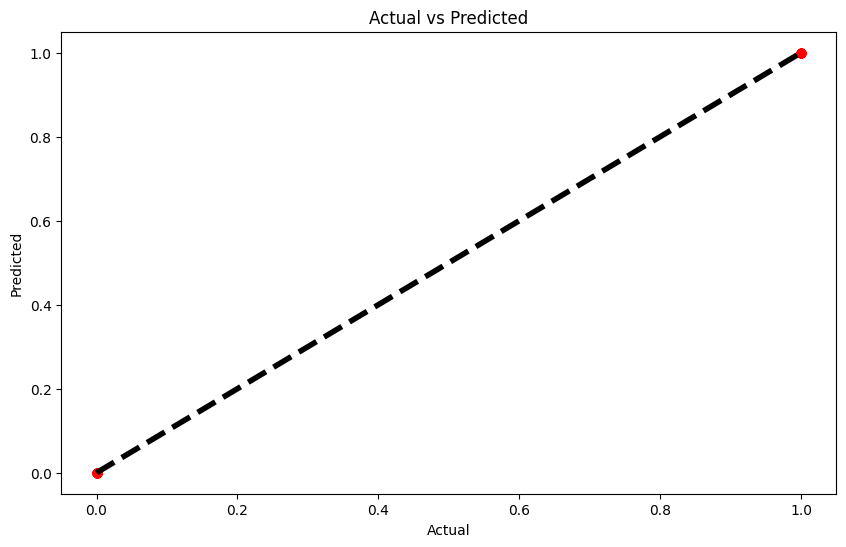

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## **Save Model**

In [ ]:
model.save('AI_ML_Model.keras')